In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import operator

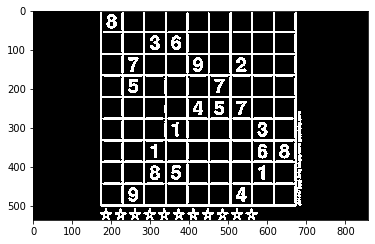

In [32]:
def proc_img(img):
    img1 = cv.GaussianBlur(img.copy(), (9, 9), 0)
    img1 = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    img1 = cv.bitwise_not(img1, img1)
    kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]], np.uint8)
    img1 = cv.dilate(img1, kernel)
    return img1

img = cv.imread('sudoku2.jpg', cv.IMREAD_GRAYSCALE)
processed = proc_img(img)
plt.imshow(processed,'gray')

In [33]:
def show_img(img):
	cv.imshow('image', img)
	cv.waitKey(0)
	cv.destroyAllWindows()

In [34]:
def display_points(img, points, radius=5, colour=(0, 0, 255)):
    img = img.copy()
    if len(colour) == 3:
        if len(img.shape) == 2:
            img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
        elif img.shape[2] == 1:
            img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    for point in points:
        img = cv.circle(img, tuple(int(x) for x in point), radius, colour, -1)
    show_img(img)

In [35]:
def grid(img):
    contours, _ = cv.findContours(img.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv.contourArea, reverse=True)
    cnt = contours[0]
    bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in cnt]), key=operator.itemgetter(1))
    top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in cnt]), key=operator.itemgetter(1))
    bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in cnt]), key=operator.itemgetter(1))
    top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in cnt]), key=operator.itemgetter(1))
    return [cnt[top_left][0], cnt[top_right][0], cnt[bottom_right][0], cnt[bottom_left][0]]

img = cv.imread('sudoku1.png', cv.IMREAD_GRAYSCALE)
processed = proc_img(img)
corners = grid(processed)
print(corners)
display_points(processed, corners)

[array([ 46, 143], dtype=int32), array([381, 146], dtype=int32), array([380, 478], dtype=int32), array([ 44, 478], dtype=int32)]


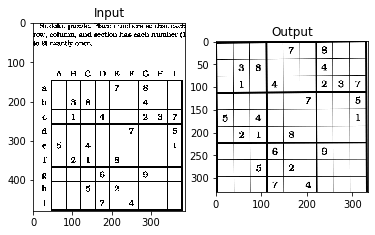

In [36]:
def perspect(img,corners):
    rows,cols = img.shape
    h = corners[1][0] - corners[0][0]
    w = corners[2][1] - corners[1][1]
    pts1 = np.float32([corners[0],corners[1],corners[3],corners[2]])
    #pts1 = np.float32([[x,y],[x+w,y],[x,y+h],[x+w,y+h]])
    pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])
    M = cv.getPerspectiveTransform(pts1,pts2)
    dst = cv.warpPerspective(img,M,(h,w))
    show_img(dst)
    plt.subplot(121),plt.imshow(img,'gray'),plt.title('Input')
    plt.subplot(122),plt.imshow(dst,'gray'),plt.title('Output')
    return dst

img = cv.imread('sudoku1.png', cv.IMREAD_GRAYSCALE)
processed = proc_img(img)
corners = grid(processed)
img_final = perspect(img,corners)

In [40]:
row,col = img_final.shape
print(row,col)

332 335


(<matplotlib.axes._subplots.AxesSubplot at 0x7feb4797d860>,
 Text(0.5, 1.0, 'Output'))

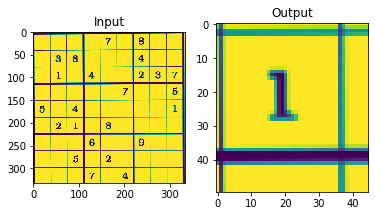

In [46]:
rowp = row/9
colp = col/9
pts1 = np.float32([[rowp,2*colp],[2*rowp,2*colp],[rowp,3*colp],[2*rowp,3*colp]])
#pts1 = np.float32([[x,y],[x+w,y],[x,y+h],[x+w,y+h]])
pts2 = np.float32([[0,0],[rowp,0],[0,colp],[rowp,colp]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img_final,M,(45,50))
plt.subplot(121),plt.imshow(img_final),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')